Neural network based on FashionMnist dataset

The first step is to implement neural network to achive accuracy > 94. The second step will be to save and deliver the model and write an interface that takes an input value and returns the value predicted by our model along with a drawn input image (so that we can visually verify that it works).
The last step is to use augmentation and achieve accuracy 97. 

In [30]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore') 

In [18]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0

labels = labels.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)


X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(lambda x, y: (data_augmentation(tf.cast(x, tf.float32)), y)).shuffle(1000).batch(128)


test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(512)


In [19]:
f_mnist_model = tf.keras.Sequential()

f_mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
f_mnist_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,586 (1.79 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
f_mnist_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
class_weights = compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

batch_size=512
epochs=80

train_stats = f_mnist_model.fit(
    train_ds,
    class_weight=class_weights,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test[..., np.newaxis], y_test),
    verbose=1
)

Epoch 1/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 164s 356ms/step - accuracy: 0.5528 - loss: 1.3438 - val_accuracy: 0.3337 - val_loss: 2.4130
Epoch 2/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 152s 357ms/step - accuracy: 0.7414 - loss: 0.7092 - val_accuracy: 0.8143 - val_loss: 0.5215
Epoch 3/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 200s 353ms/step - accuracy: 0.7752 - loss: 0.6239 - val_accuracy: 0.8312 - val_loss: 0.4715
Epoch 4/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 153s 360ms/step - accuracy: 0.7966 - loss: 0.5595 - val_accuracy: 0.8402 - val_loss: 0.4392
Epoch 5/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 154s 364ms/step - accuracy: 0.8090 - loss: 0.5284 - val_accuracy: 0.8498 - val_loss: 0.3942
Epoch 6/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 152s 359ms/step - accuracy: 0.8192 - loss: 0.4918 - val_accuracy: 0.8583 - val_loss: 0.3769
Epoch 7/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 153s 361ms/step - accuracy: 0.8240 - loss: 0.4822 - val_accuracy: 0.8612 - val_loss: 0.3779
Epoch 8/80
422/422 ━━━━━━━━━━━━━━━━━━━━ 153s 361ms/step - accuracy: 0.8317 -

In [23]:
X_test = np.expand_dims(X_test, axis=-1)  
X_test = X_test.astype(np.float32)       
y_test = y_test.astype(np.int32) 

test_loss, test_accuracy = f_mnist_model.evaluate(X_test, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9154 - loss: 0.2206


In [24]:
#i am checking just in case if data are normalized
print("Zakres X_train:", X_train.min(), X_train.max())
print("Zakres X_test:", X_test.min(), X_test.max())

Zakres X_train: 0.0 1.0
Zakres X_test: 0.0 1.0


In [25]:
#i am checking if pictures in test set don't repeat in train set
overlap_count = sum([np.array_equal(x, y) for x in X_test for y in X_train])

if overlap_count > 0:
    print(f"Overlap detected: {overlap_count} overlapping images found.")
else:
    print("No overlap detected between training and test sets.")


No overlap detected between training and test sets.


188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


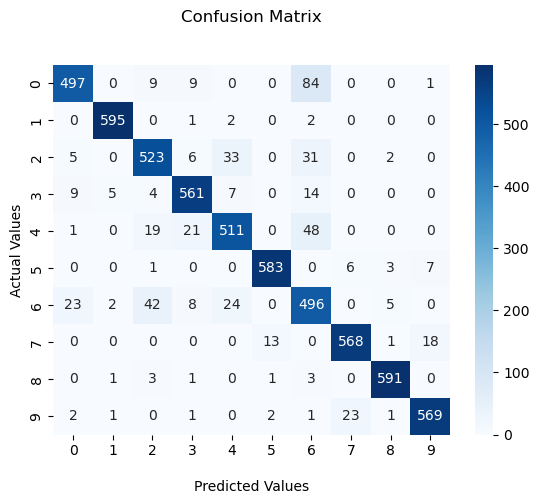

In [26]:
y_pred = f_mnist_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
plt.show()

In [27]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       600
           1       0.99      0.99      0.99       600
           2       0.87      0.87      0.87       600
           3       0.92      0.94      0.93       600
           4       0.89      0.85      0.87       600
           5       0.97      0.97      0.97       600
           6       0.73      0.83      0.78       600
           7       0.95      0.95      0.95       600
           8       0.98      0.98      0.98       600
           9       0.96      0.95      0.95       600

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



In [29]:
f_mnist_model.save('f_mnist_model.keras')

In [32]:
loaded_model = load_model("f_mnist_model.keras")
loaded_model.evaluate(X_test, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9154 - loss: 0.2206


[0.22632844746112823, 0.9156666398048401]

In [33]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[5])
print("class : ", np.argmax(y_pred[5]))
print("real class : ", y_test[5])

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
probs :  [6.9220463e-11 3.3455708e-12 6.3819277e-14 1.8474042e-10 1.7112503e-14
 9.9999988e-01 4.2494688e-12 5.0287284e-08 1.4488037e-07 1.8963201e-08]
class :  5
real class :  5


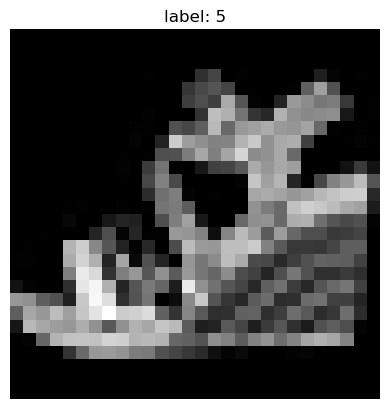

In [34]:
plt.imshow(X_test[5].squeeze(), cmap='gray')
plt.title(f"label: {y_test[5]}")
plt.axis('off')
plt.show()

Unfortunately i was able to achieve only 91,5% accuracy on test set. I trained this model two times and in first case i achieved 92,6% accuracy. It's probably because of randomness during training. I should use random_seed(i read about that). 

I tried with 10, 20, 30, 50 and 80 epochs, with 80 epochs results are the best. I also checked batch size 32, 64, 128, 256 and 512 - this one is the best. To improve the model i introduced conv2d layer, dropout and batchnormalization. I also noticed that the biggest classification problem is with class 6. This class is confused with classes 0, 2, 3, 4 so i added weight balance. I also used data augmentation with random flip, random rotation, random zoom and random contrast. I was studying lots of FashionMNIST case studies on Kaggle and i didn't find any with higher accuracy which is at my level of knowledge. Of course i could prescribe it and achieve better results but i dont think this is the point. I hope in future i will fix it. 